## I. Overview of Geo Dataset and its classes

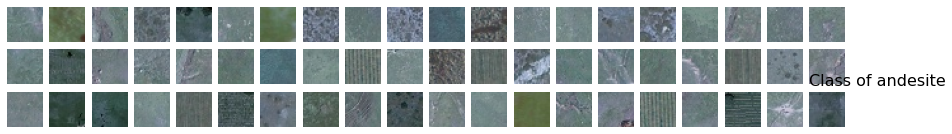

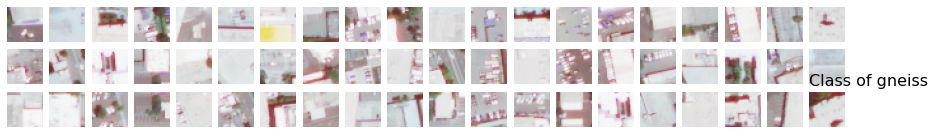

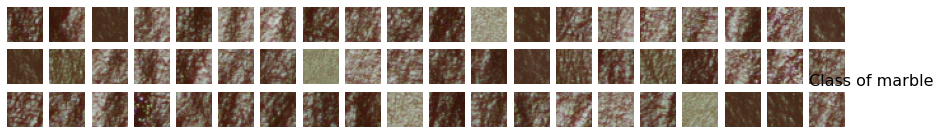

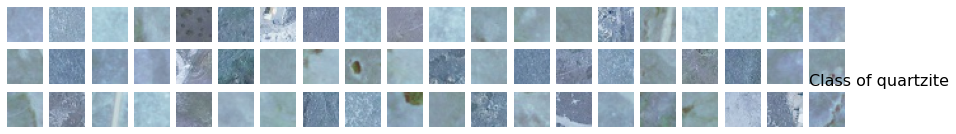

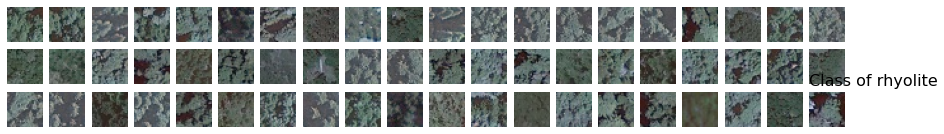

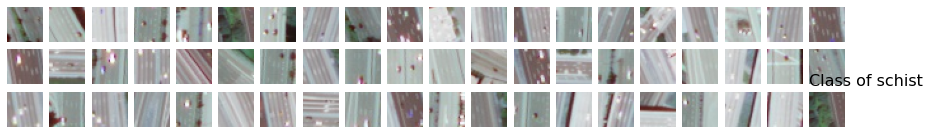

In [4]:
from utils_my import images_show, image_gallery, geo_dict
import os
geo_path = 'C:/Project_Data/geological_similarity'
images_list, target_list = [], []
for label in geo_dict.keys():
    # print('indexing', label, '... ')
    # time.sleep(0.3)
    label_path = os.path.join(geo_path, label).replace("\\", "/")
    images = [label_path + '/' + img for img in os.listdir(label_path)[:60]]
    targets = [geo_dict[label]] * len(images)
    images_list.extend(images)
    target_list.extend(targets)
    image_gallery(images, [label] * len(images), columns=20, figsize=(15, 3), class_show=False, title_show=label)

## II. Dynamic Time Wrapping (DWT)

### A.Data extraction

In [5]:
from PIL import Image
from numpy import array
import os
from tqdm import tqdm
# load geo data

geo_path = 'C:/Project_Data/geological_similarity_8x'
images_list, target_list = [], []
for label in geo_dict.keys():
    # print('indexing', label, '... ')
    # time.sleep(0.3)
    label_path = os.path.join(geo_path, label).replace("\\", "/")
    images = [label_path + '/' + img for img in os.listdir(label_path)]
    targets = [geo_dict[label]] * len(images)
    images_list.extend(images)
    target_list.extend(targets)

data = {}
for fn in tqdm(images_list):
    img = Image.open("{0}".format(fn))
    arr = array(img)
    # arr = np.moveaxis(array(img), 2, -3)
    list = []
    for n in arr: list.append(n[0][0])
    for n in arr: list.append(n[0][1])
    for n in arr: list.append(n[0][2])
    data[fn] = list

#########################


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29998/29998 [00:39<00:00, 758.28it/s]


In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def images_show(images, distances, figsize=(20, 20), columns=3, fontsize=10, class_show=False):
    # https://stackoverflow.com/questions/19471814/display-multiple-images-in-one-ipython-notebook-cell
    import matplotlib.pyplot as plt
    plt.figure(figsize=figsize)
    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        if class_show:
            plt.title('{0} : {1}'.format(image[-9:],distances[i]), fontsize=fontsize)
        plt.axis('off')
        img = mpimg.imread(image)
        plt.imshow(img)
    plt.show()


### B. Quick DTW Analysis over samples across classes
##### DTW for andesite sample

In [6]:
from dtw import *
from collections import OrderedDict
import itertools
RefNum = 51
ref = data[images_list[RefNum]]
print('Reference Image is: {0}'.format(images_list[RefNum]))
result ={}
for fn, query in tqdm(data.items()):
    #print("{0} --------------- {1}".format(x,y))
    dist = dtw(query, ref, distance_only=True, keep_internals=False)
    result[fn] = dist.distance


sortedRes = OrderedDict(sorted(result.items(), key=lambda x: x[1]))
for a, b in itertools.islice(sortedRes.items(),0,10):
    im = Image.open(a)
    im.show()
    print("{0}-{1}".format(a,b))



  0%|                                                                                                                                                                                              | 4/29998 [00:00<13:59, 35.72it/s]

Reference Image is: C:/Project_Data/geological_similarity_8x/andesite/0DUXP.jpg


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29998/29998 [13:48<00:00, 36.20it/s]


C:/Project_Data/geological_similarity_8x/andesite/0DUXP.jpg-0.0
C:/Project_Data/geological_similarity_8x/andesite/ILDWS.jpg-1369.0
C:/Project_Data/geological_similarity_8x/andesite/5B9TQ.jpg-1380.0
C:/Project_Data/geological_similarity_8x/andesite/ZNT58.jpg-1386.0
C:/Project_Data/geological_similarity_8x/andesite/PAI3Z.jpg-1443.0
C:/Project_Data/geological_similarity_8x/andesite/DR82W.jpg-1452.0
C:/Project_Data/geological_similarity_8x/andesite/W3U7R.jpg-1471.0
C:/Project_Data/geological_similarity_8x/andesite/TL5EK.jpg-1486.0
C:/Project_Data/geological_similarity_8x/andesite/SRIKF.jpg-1507.0
C:/Project_Data/geological_similarity_8x/andesite/M4J20.jpg-1524.0


C:\Project_Env\IRIS\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  


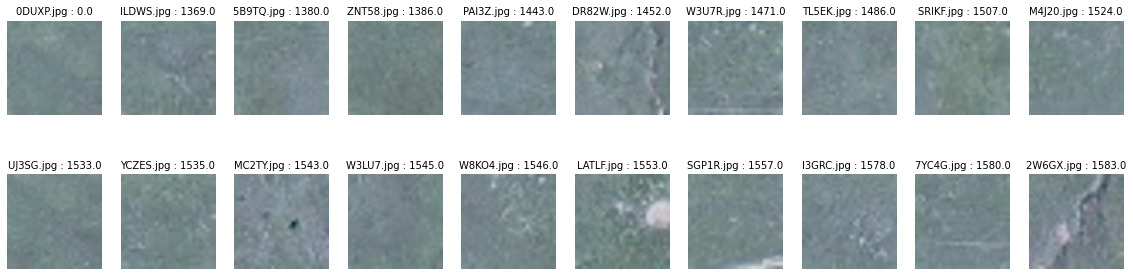

In [36]:
ImgNum = 20
images = [a for a, b in itertools.islice(sortedRes.items(),0,ImgNum)]
distances = [b for a, b in itertools.islice(sortedRes.items(),0,ImgNum)]

images_show(images, distances, columns=10, figsize=(20, 8), class_show=True)

##### DTW for andesite sample

  0%|                                                                                                                                                                                              | 4/29998 [00:00<13:37, 36.70it/s]

Reference Image is: C:/Project_Data/geological_similarity_8x/andesite/0DJWM.jpg


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29998/29998 [14:03<00:00, 35.54it/s]
C:\Project_Env\IRIS\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  


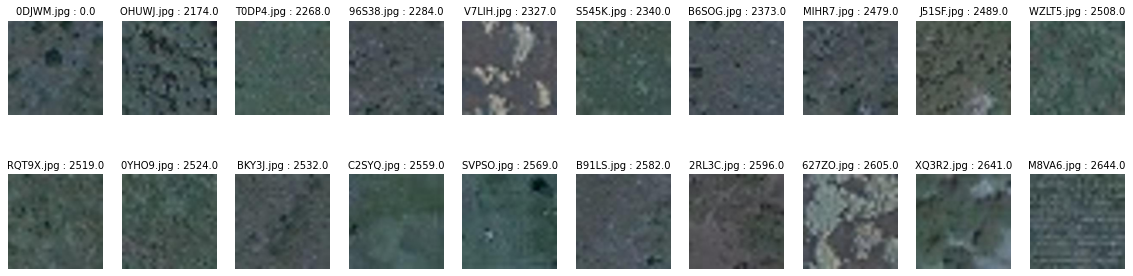

In [41]:
from dtw import *
from collections import OrderedDict
from itertools import islice
RefImg = 'C:/Project_Data/geological_similarity_8x/andesite/0DJWM.jpg'
ref = data[RefImg]
print('Reference Image is: {0}'.format(RefImg))
result ={}
for fn, query in tqdm(data.items()):
    #print("{0} --------------- {1}".format(x,y))
    dist = dtw(query, ref, distance_only=True, keep_internals=False)
    result[fn] = dist.distance
sortedRes = OrderedDict(sorted(result.items(), key=lambda x: x[1]))
ImgNum = 20
images = [a for a, b in islice(sortedRes.items(),0,ImgNum)]
distances = [b for a, b in islice(sortedRes.items(),0,ImgNum)]

images_show(images, distances, columns=10, figsize=(20, 8), class_show=True)

##### DTW for gneiss sample

  0%|                                                                                                                                                                                              | 4/29998 [00:00<13:37, 36.70it/s]

Reference Image is: C:/Project_Data/geological_similarity_8x/gneiss/1BLED.jpg


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29998/29998 [14:02<00:00, 35.62it/s]
C:\Project_Env\IRIS\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  


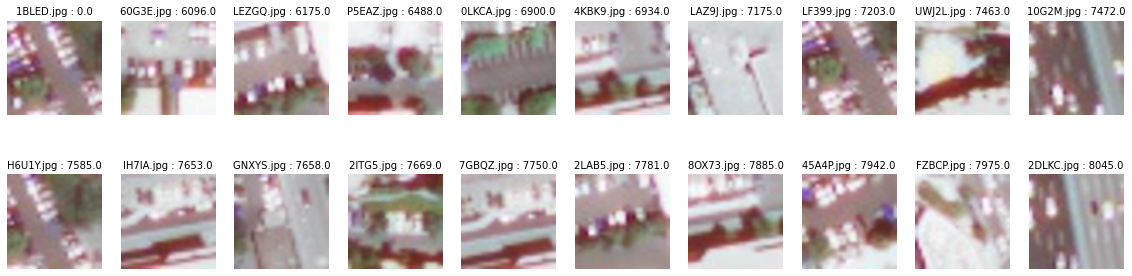

In [42]:
RefImg = 'C:/Project_Data/geological_similarity_8x/gneiss/1BLED.jpg'
ref = data[RefImg]
print('Reference Image is: {0}'.format(RefImg))
result ={}
for fn, query in tqdm(data.items()):
    #print("{0} --------------- {1}".format(x,y))
    dist = dtw(query, ref, distance_only=True, keep_internals=False)
    result[fn] = dist.distance
sortedRes = OrderedDict(sorted(result.items(), key=lambda x: x[1]))
ImgNum = 20
images = [a for a, b in itertools.islice(sortedRes.items(),0,ImgNum)]
distances = [b for a, b in itertools.islice(sortedRes.items(),0,ImgNum)]

images_show(images, distances, columns=10, figsize=(20, 8), class_show=True)

##### DTW for marble sample

  0%|                                                                                                                                                                                              | 4/29998 [00:00<13:52, 36.04it/s]

Reference Image is: C:/Project_Data/geological_similarity_8x/marble/7VZEF.jpg


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29998/29998 [14:14<00:00, 35.12it/s]
C:\Project_Env\IRIS\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  


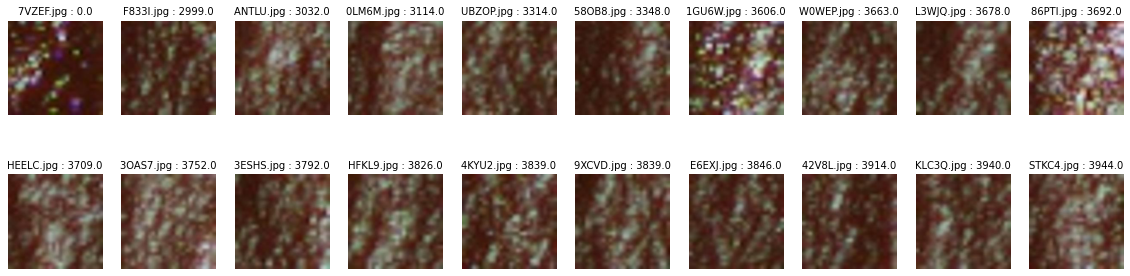

In [43]:
RefImg = 'C:/Project_Data/geological_similarity_8x/marble/7VZEF.jpg'
ref = data[RefImg]
print('Reference Image is: {0}'.format(RefImg))
result ={}
for fn, query in tqdm(data.items()):
    #print("{0} --------------- {1}".format(x,y))
    dist = dtw(query, ref, distance_only=True, keep_internals=False)
    result[fn] = dist.distance
sortedRes = OrderedDict(sorted(result.items(), key=lambda x: x[1]))
ImgNum = 20
images = [a for a, b in itertools.islice(sortedRes.items(),0,ImgNum)]
distances = [b for a, b in itertools.islice(sortedRes.items(),0,ImgNum)]

images_show(images, distances, columns=10, figsize=(20, 8), class_show=True)

##### DTW for quartzite sample

  0%|                                                                                                                                                                                              | 4/29998 [00:00<13:37, 36.70it/s]

Reference Image is: C:/Project_Data/geological_similarity_8x/quartzite/1NEXI.jpg


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29998/29998 [14:09<00:00, 35.30it/s]
C:\Project_Env\IRIS\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  


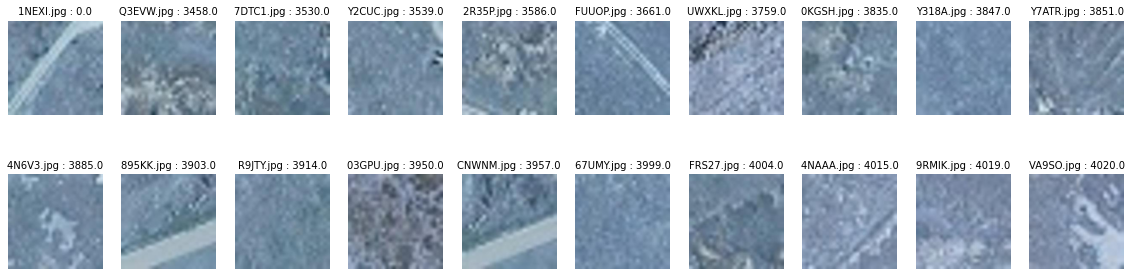

In [44]:

RefImg = 'C:/Project_Data/geological_similarity_8x/quartzite/1NEXI.jpg'
ref = data[RefImg]
print('Reference Image is: {0}'.format(RefImg))
result ={}
for fn, query in tqdm(data.items()):
    #print("{0} --------------- {1}".format(x,y))
    dist = dtw(query, ref, distance_only=True, keep_internals=False)
    result[fn] = dist.distance
sortedRes = OrderedDict(sorted(result.items(), key=lambda x: x[1]))
ImgNum = 20
images = [a for a, b in itertools.islice(sortedRes.items(),0,ImgNum)]
distances = [b for a, b in itertools.islice(sortedRes.items(),0,ImgNum)]

images_show(images, distances, columns=10, figsize=(20, 8), class_show=True)

##### DTW for rhyolite sample

  0%|                                                                                                                                                                                              | 4/29998 [00:00<14:07, 35.40it/s]

Reference Image is: C:/Project_Data/geological_similarity_8x/rhyolite/X60WW.jpg


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29998/29998 [13:26<00:00, 37.21it/s]
C:\Project_Env\IRIS\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  


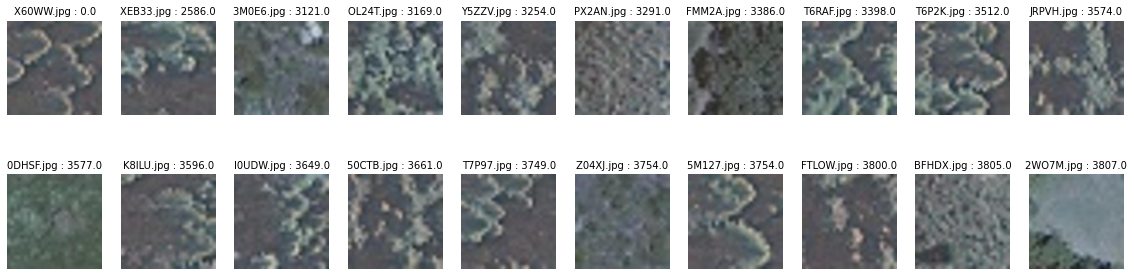

In [45]:

RefImg = 'C:/Project_Data/geological_similarity_8x/rhyolite/X60WW.jpg'
ref = data[RefImg]
print('Reference Image is: {0}'.format(RefImg))
result ={}
for fn, query in tqdm(data.items()):
    #print("{0} --------------- {1}".format(x,y))
    dist = dtw(query, ref, distance_only=True, keep_internals=False)
    result[fn] = dist.distance
sortedRes = OrderedDict(sorted(result.items(), key=lambda x: x[1]))
ImgNum = 20
images = [a for a, b in itertools.islice(sortedRes.items(),0,ImgNum)]
distances = [b for a, b in itertools.islice(sortedRes.items(),0,ImgNum)]

images_show(images, distances, columns=10, figsize=(20, 8), class_show=True)

##### DTW for schist sample

  0%|                                                                                                                                                                                              | 4/29998 [00:00<12:37, 39.61it/s]

Reference Image is: C:/Project_Data/geological_similarity_8x/schist/5POAU.jpg


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29998/29998 [13:36<00:00, 36.75it/s]
C:\Project_Env\IRIS\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  


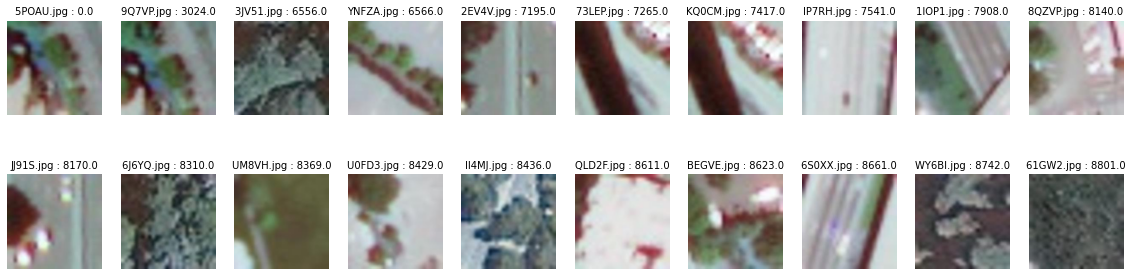

In [46]:

RefImg = 'C:/Project_Data/geological_similarity_8x/schist/5POAU.jpg'
ref = data[RefImg]
print('Reference Image is: {0}'.format(RefImg))
result ={}
for fn, query in tqdm(data.items()):
    #print("{0} --------------- {1}".format(x,y))
    dist = dtw(query, ref, distance_only=True, keep_internals=False)
    result[fn] = dist.distance
sortedRes = OrderedDict(sorted(result.items(), key=lambda x: x[1]))
ImgNum = 20
images = [a for a, b in itertools.islice(sortedRes.items(),0,ImgNum)]
distances = [b for a, b in itertools.islice(sortedRes.items(),0,ImgNum)]

images_show(images, distances, columns=10, figsize=(20, 8), class_show=True)

### DTW Three-Way analysis for the selected close samples

In [50]:
def get_data(Img_list):
    data = {}
    for fn in tqdm(Img_list):
        img = Image.open("{0}".format(fn))
        arr = array(img)
        # arr = np.moveaxis(array(img), 2, -3)
        list = []
        for n in arr: list.append(n[0][0]);
        for n in arr: list.append(n[0][1]);
        for n in arr: list.append(n[0][2])
        data[fn] = list
    return data

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.01it/s]


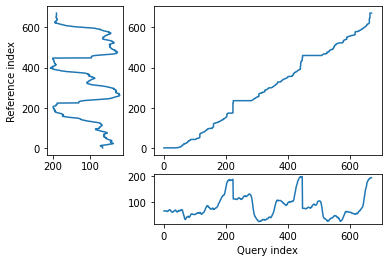

<AxesSubplot:>

In [51]:
Img_list = ['C:/Project_Data/geological_similarity_8x/schist/5POAU.jpg',
            'C:/Project_Data/geological_similarity_8x/schist/9Q7VP.jpg']
data = get_data(Img_list)
al = dtw(data[Img_list[1]], data[Img_list[0]], keep_internals=True)
al.plot(type="threeway")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.82it/s]


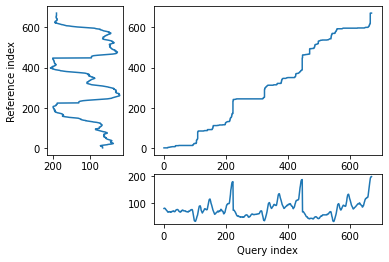

<AxesSubplot:>

In [53]:
Img_list = ['C:/Project_Data/geological_similarity_8x/schist/5POAU.jpg',
            'C:/Project_Data/geological_similarity_8x/rhyolite/3JV51.jpg']
data = get_data(Img_list)
al = dtw(data[Img_list[1]], data[Img_list[0]], keep_internals=True)
al.plot(type="threeway")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.01it/s]


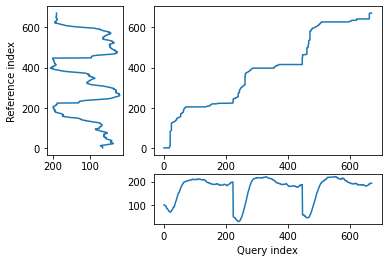

<AxesSubplot:>

In [55]:
Img_list = ['C:/Project_Data/geological_similarity_8x/schist/5POAU.jpg',
            'C:/Project_Data/geological_similarity_8x/schist/6S0XX.jpg']
data = get_data(Img_list)
al = dtw(data[Img_list[1]], data[Img_list[0]], keep_internals=True)
al.plot(type="threeway")

### DTW Full 3-Channel analysis

In this section, a full DTW analysis will be performed for a sample image query over entire geo dataset.
As we can see, this full analysis is very time consuming and it takes about an hour to search through entire dataset, however the results visually are better and as we can see, all from the same class of the query. Unlike the previous quick analysis which we had results from different classes.

  0%|                                                                                                                                                                                              | 1/29998 [00:00<58:59,  8.47it/s]

Reference Image is: C:/Project_Data/geological_similarity_8x/schist/5POAU.jpg


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29998/29998 [1:01:51<00:00,  8.08it/s]
C:\Project_Env\IRIS\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  


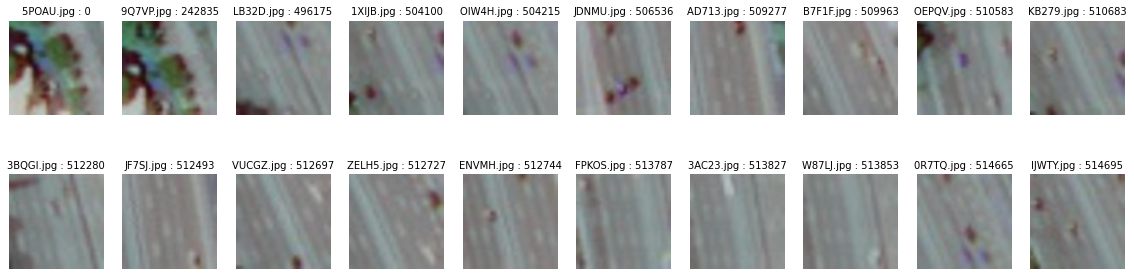

In [84]:
from PIL import Image
from numpy import array
import os
from tqdm import tqdm
# load geo data
geo_dict = {
    'andesite': 0,
    'gneiss': 1,
    'marble': 2,
    'quartzite': 3,
    'rhyolite': 4,
    'schist': 5
}
geo_path = 'C:/Project_Data/geological_similarity_8x'
images_list, target_list = [], []
for label in geo_dict.keys():
    # print('indexing', label, '... ')
    # time.sleep(0.3)
    label_path = os.path.join(geo_path, label).replace("\\", "/")
    images = [label_path + '/' + img for img in os.listdir(label_path)]
    targets = [geo_dict[label]] * len(images)
    images_list.extend(images)
    target_list.extend(targets)

data = {}
for fn in tqdm(images_list):
    img = Image.open("{0}".format(fn))
    arr = array(img)
    # arr = np.moveaxis(array(img), 2, -3)
    data[fn] = arr.reshape(arr.shape[0]*arr.shape[2],arr.shape[1])


RefImg = 'C:/Project_Data/geological_similarity_8x/schist/5POAU.jpg'
ref = data[RefImg]
print('Reference Image is: {0}'.format(RefImg))
result ={}
for fn, query in tqdm(data.items()):
    #print("{0} --------------- {1}".format(x,y))
    dist = dtw(query, ref, distance_only=True, keep_internals=False)
    result[fn] = dist.distance
sortedRes = OrderedDict(sorted(result.items(), key=lambda x: x[1]))
ImgNum = 20
images = [a for a, b in itertools.islice(sortedRes.items(),0,ImgNum)]
distances = [int(b) for a, b in itertools.islice(sortedRes.items(),0,ImgNum)]

images_show(images, distances, columns=10, figsize=(20, 8), class_show=True)




##### DTW Three-way full analysis on the selected samples

In [93]:
def get_data_orig(Img_list):
    data = {}
    for fn in tqdm(Img_list):
        img = Image.open("{0}".format(fn))
        arr = array(img)
        # arr = np.moveaxis(array(img), 2, -3)
        data[fn] = arr.reshape(arr.shape[0]*arr.shape[2],arr.shape[1])
    return data

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 1000.31it/s]


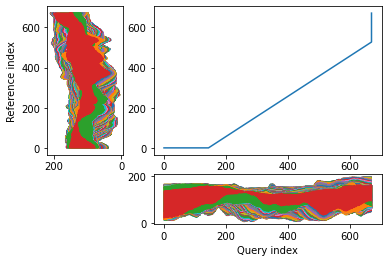

242835.7191887206


In [98]:
Img_list = ['C:/Project_Data/geological_similarity_8x/schist/5POAU.jpg',
            'C:/Project_Data/geological_similarity_8x/schist/9Q7VP.jpg']
data = get_data_orig(Img_list)
al = dtw(data[Img_list[1]], data[Img_list[0]], keep_internals=True)
al.plot(type="threeway")
print(al.distance)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.50it/s]


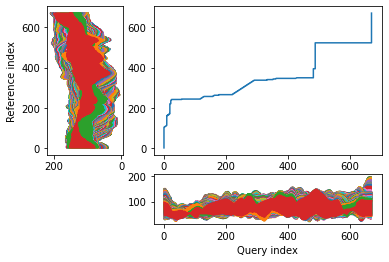

685558.9029603722


In [99]:
Img_list = ['C:/Project_Data/geological_similarity_8x/schist/5POAU.jpg',
            'C:/Project_Data/geological_similarity_8x/rhyolite/3JV51.jpg']
data = get_data_orig(Img_list)
al = dtw(data[Img_list[1]], data[Img_list[0]], keep_internals=True)
al.plot(type="threeway")
print(al.distance)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 666.77it/s]


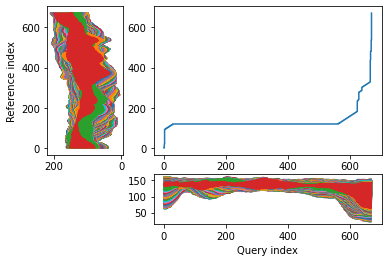

496175.2854073407


In [100]:
Img_list = ['C:/Project_Data/geological_similarity_8x/schist/5POAU.jpg',
            'C:/Project_Data/geological_similarity_8x/schist/LB32D.jpg']
data = get_data_orig(Img_list)
al = dtw(data[Img_list[1]], data[Img_list[0]], keep_internals=True)
al.plot(type="threeway")
print(al.distance)